In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"



# Combine the data into a single dataset

# Display the data table for preview


In [2]:

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
city_data
ride_data = pd.read_csv(ride_data_to_load)
ride_data
#Removing duplicate from the city data
city_data = city_data.drop_duplicates('city', keep = 'first')
city_data
# Combine the data into a single dataset
combined_data = pd.merge(ride_data, city_data, on='city',how = 'left')
combined_data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [3]:
# Obtain the x and y coordinates for each of the three city types
data_by_city = combined_data.groupby('city')
data_by_city.head()
# Obtain the x (average fares)
avg_fare = data_by_city["fare"].mean()
avg_fare
# Obtain the y (total number of rides per city)
num_rides = data_by_city["ride_id"].count()
num_rides
# Obtain the driver count per city
totalno_driver = data_by_city["driver_count"].mean()
totalno_driver
# Obtain the city type
city_type = city_data.set_index('city')['type']
city_type.head()
#creating new data frame
city_ride_df = pd.DataFrame({"Number of Rides": num_rides,"Average Fare": avg_fare,"Number of Drivers": totalno_driver,
   "City Type": city_type
})
city_ride_df

,Number of Rides,Average Fare,Number of Drivers,City Type
Amandaburgh,18,24.641667,12,Urban
Barajasview,22,25.332273,26,Urban
Barronchester,16,36.422500,11,Suburban
Bethanyland,18,32.956111,22,Suburban
Bradshawfurt,10,40.064000,7,Rural
Brandonfort,19,35.437368,10,Suburban
Carriemouth,27,28.314444,52,Urban
Christopherfurt,27,24.501852,41,Urban
Colemanland,22,30.894545,23,Suburban
Davidfurt,17,31.995882,23,Suburban


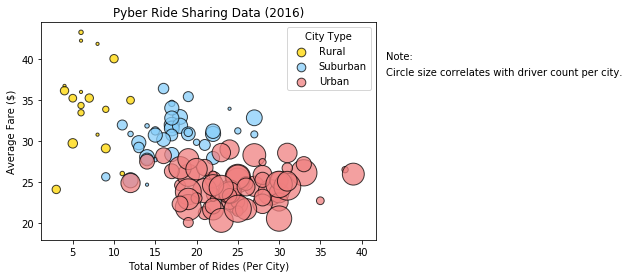

In [5]:
#grouping the city ride info into 3 types
rural_df = city_ride_df[city_ride_df["City Type"] == 'Rural']
rural_df
suburban_df = city_ride_df[city_ride_df["City Type"] == 'Suburban']
suburban_df
urban_df = city_ride_df[city_ride_df["City Type"] == 'Urban']
urban_df
#Color schemes for three city types
city_color = {'Rural': '#FFD700', 'Suburban': '#87CEFA', 'Urban': '#F08080'}
#Build the scatter plots for each city type
plt.scatter(rural_df['Number of Rides'], rural_df['Average Fare'], s = rural_df['Number of Drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)  
plt.scatter(suburban_df['Number of Rides'], suburban_df['Average Fare'], s = suburban_df['Number of Drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)  
plt.scatter(urban_df['Number of Rides'], urban_df['Average Fare'], s = urban_df['Number of Drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75) 
#print scatter plot graph properties

plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

# Create a legend
lgnd = plt.legend(loc="upper right",title="City Type")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
# Incorporate a text label regarding circle size
plt.text(43,40,"Note:")
plt.text(43,38,"Circle size correlates with driver count per city.")
# Save Figure
plt.savefig("../Images/pyber/scatterplot_cityrides.png")
plt.show()

## Total Fares by City Type

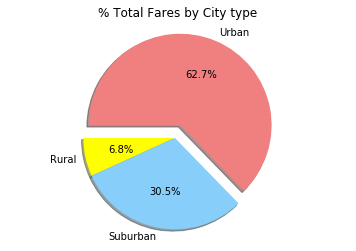

In [7]:
# Calculate Type Percents
type_data = combined_data.groupby('type')
type_data.head()
#total fare by city type
total_fare = type_data['fare'].sum()
total_fare
#list of city types
city = total_fare.index
city
# Build Pie Chart
colors = ["yellow","lightskyblue", "lightcoral"]
explode = [0 , 0, .15]
plt.pie(total_fare, explode=explode, labels=city, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")
plt.title('% Total Fares by City type')
# Save Figure
plt.savefig("../Images/pyber/Total_Fares_by_City.png")
plt.show()

## Total Rides by City Type

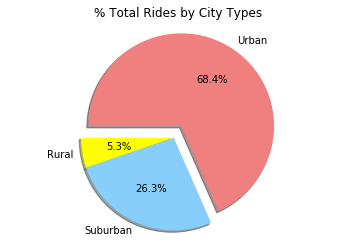

In [8]:
# Calculate Ride Percents

#Total Ride by city type
total_ride = type_data['ride_id'].count()
total_ride
#list of city types
city = total_fare.index
city
# Build Pie Chart
colors = ["yellow","lightskyblue", "lightcoral"]
explode = [0 , 0, .15]
plt.pie(total_ride, explode=explode, labels=city, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle= 180)
plt.axis("equal")
plt.title('% Total Rides by City Types')
# Save Figure

plt.savefig("../Images/pyber/Total_Rides_by_City.png")
plt.show()

## Total Drivers by City Type

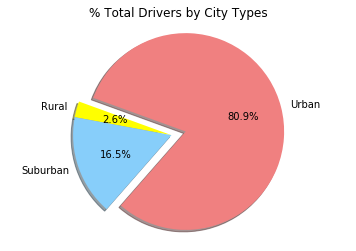

In [9]:
# Calculate Driver Percents
driver_city = city_data.groupby('type')

#Total Ride by city type
total_drivers = driver_city['driver_count'].sum()
total_drivers
#list of city types
city = total_fare.index
city
# Build Pie Chart
colors = ["yellow","lightskyblue", "lightcoral"]
explode = [0 , 0, .15]
plt.pie(total_drivers, explode=explode, labels=city, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
plt.axis("equal")
plt.title('% Total Drivers by City Types')
# Save Figure

plt.savefig("../Images/pyber/Total_Drivers_by_City.png")
plt.show()